# Applied Examples

In this final section we will cover some applied examples with NumPy. We will cover a few "from scratch" examples as well as using the scikit-learn library. Hopefully this will sell you on the idea using arrays and vectorized math can be useful and practical. 

## Linear Regression with Hill Climbing 

While this is not the most efficient algorithm available for linear regression, it is a cool exercise nonetheless that teaches concepts applicable to other problems. More specifically, we are going to learn hill climbing. The idea behind hill climbing is to make random adjustments to a solution, and if those adjustments result in an improvement, we keep them. We do this thousands or millions of times until the solution does not improve anymore. 

A simple linear regression solves for coefficients $ \beta_0 $ and $ \beta_1 $ given input data $ x $ and output data $ y $. We try to assess a linear relationship between $ x $ and $ y $ and fit the data accordingly. 

$$
\Large y = \Large \beta_0 + \Large \beta_1 x
$$

Let's import these two columns of data $ x $ and $ y $ off of Github and save them to two NumPy arrays. 

In [27]:
import numpy as np
import pandas as pd

data = pd.read_csv("https://bit.ly/2KF29Bd").values
x = data[:,0]
y = data[:,-1]

In [28]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [29]:
y

array([ 5, 10, 10, 15, 14, 15, 19, 18, 25, 23])

Next we are going to declare the beta coefficients `b` as a NumPy array which will initialize both $ \beta_0 $ and $ \beta_1 $ as $ 0.0 $. We will also run our hill climbing for 150,000 iterations (`epochs`) and start our loss at a REALLY high number. This will make more sense shortly. 



In [30]:
# Building the model
b = np.array([0.0, 0.0]) 

epochs = 150000  # The number of iterations to perform
n = float(data.shape[0])  # Number of points
best_loss = 10000000000000.0  # Initialize with a really large value

We are going to make our objective a loss function, more specifically the sum of squares. For a given line with $ \beta_0 $ and $ \beta_1 $, we calculate the differences between the line and the given data points, and then square and sum those differences. This sum of squares is what we want to minimize. For every random adjustment to $ \beta_0 $ and $ \beta_1 $, we will calculate the sum of squares and see if it has been reduced. If not, we undo those random adjustments.

But how do we randomly adjust $ \beta_0 $ and $ \beta_1 $? We can use random values from the normal distribution, with a mean of 0 and standard deviation of 1. This will create a volume of mostly small adjustments near 0, but occasionally we make larger adjustments on the tails in the positive and negative directions. 

In [31]:
for i in range(epochs):

    # Randomly adjust "m" and "b"
    random_adj = np.random.normal(loc=0,scale=1,size=2)
    b += random_adj
    
    # Calculate loss, which is total sum squared error
    new_loss = ((y - (b[0] + b[1] * x)) ** 2).sum()
    
    # If loss has improved, keep new values. Otherwise revert.
    if new_loss < best_loss:
        print(f"y = {b[0]} + {b[1]}x")
        best_loss = new_loss
    else:
        b -= random_adj
        
print(f"y = {b[0]} + {b[1]}x")


y = -1.7222278942308247 + -0.19514781794750194x
y = -1.2518485659842482 + -0.22868476690932363x
y = -1.6165001845406202 + -0.1699400578315546x
y = -1.3086360753068114 + 1.182011953583008x
y = 0.1277325015556796 + 1.5044324692819457x
y = 0.4103153187740809 + 1.9405803576013088x
y = 1.8491610311691644 + 2.474960004908235x
y = 2.6880669616082056 + 2.346722840237594x
y = 4.565878806341162 + 2.063457877767564x
y = 5.145759696643675 + 1.8718388208409755x
y = 4.31121500416519 + 1.996754188338295x
y = 5.022325391626877 + 1.9099194154883397x
y = 4.734815141398816 + 1.94963322401612x
y = 4.668415766071366 + 1.9473435233698935x
y = 4.690421748379631 + 1.9437522185397953x
y = 4.769686289588102 + 1.9325979646653024x
y = 4.773522689088951 + 1.934590777701392x
y = 4.701339120983505 + 1.945574267468568x
y = 4.7013391209835085 + 1.9455742674685523x


To quickly see the quality of the fit, let's use matplotlib to see how well the line fit to the data points. 

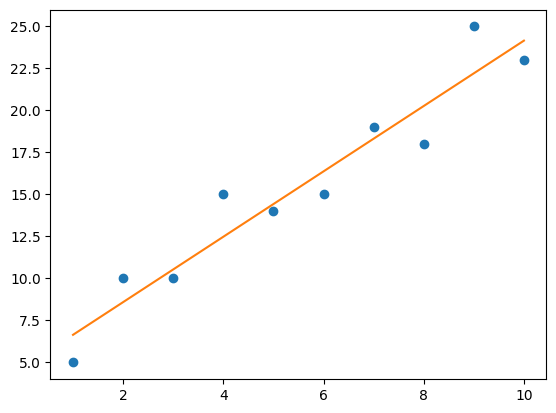

In [32]:
# plot 
import matplotlib.pyplot as plt
import numpy as np 

# show in chart
plt.plot(x, y, 'o') # scatterplot
plt.plot(x, b[1]*x + b[0]) # line
plt.show()

## Linear Regression with scikit-learn

While hill climbing can be used to solve a variety of problems, linear regression has some shortcuts using linear algebra methods which we cover [in another course](https://learning.anaconda.cloud/linear-algebra). But for now, we can use scikit-learn and leverage NumPy arrays to pass the data. 

Below, we read the same CSV from the previous example and extract out the `X` and `y` columns. We then fit a `LinearRegression` and get the coefficients from `coef_` and `intercept_`. However, those will return multidimensional arrays so we flatten them. 

b1 = [1.93939394]
b0 = [4.73333333]


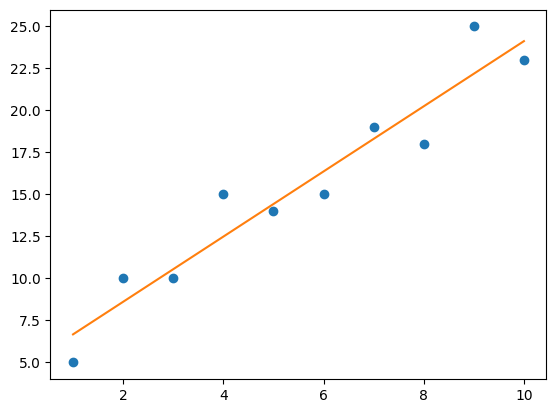

In [33]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("https://bit.ly/2KF29Bd", delimiter=",")

# Extract input variables (all rows, all columns but last column)
x = df.values[:, :-1]

# Extract output column (all rows, last column)
y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(x, y)

# m = 1.7867224, b = -16.51923513
b1 = fit.coef_.flatten()
b0 = fit.intercept_.flatten()
print(f"b1 = {b1}")
print(f"b0 = {b0}")

# show in chart
plt.plot(x, y, 'o') # scatterplot
plt.plot(x, b1*x+b0) # line
plt.show()

## Customer Queue Simulation

In this example, we are going to simulate customers walking into a bank, grocery store, etc. where they are processed one-a-time. To keep things simple we will only have a single clerk to process each customer, although you are free to adapt this to account for multiple clerks. The purpose of this simulation is to see whether a line will form and get out-of-hand, and we could theoretically use this to predict average wait times of customers. 

Recall we studied many probability distributions. The normal distribution might make sense for the customer processing time, assuming the processing time follows a normal distribution. But what about the flow of customers into the store? The exponential distribution will  model how much time lapses between each customer walking in. 

Let's build the simulation below using the normal distribution and exponential distribution. The customers will take on average 3 minutes to process with a standard deviation of .5 minutes. We will model 20 customers on average arriving every hour, but to be consistent in minutes that is $ 1/3 $ of a customer every minute. We will run the simulation for the first 100 customers. 

Note this is a little involved but the idea is we are using these two distributions to create a "realistic" simulation. Run the simulation and observe its output before you dive into the code itself. 

In [34]:
import numpy as np
from numpy.random import normal, exponential

np.random.seed(0) # use random seed to run identical "random" simulations

mean_checkout_time = 3  # minutes
std_checkout_time = .5  # minutes
mean_arrival_rate = 20 / 60  # customers per minute
customer_ct = 100

# customer arrival times relative to the previous customer
customer_time_betweens = exponential(scale=1/mean_arrival_rate, size=customer_ct+2) # need to add 2 to prevent out-of-index errors

# customer arrival times as minutes since start of simulation
customer_arrival_times = np.cumsum(customer_time_betweens)

# customer checkout times
customer_checkout_times = normal(loc=mean_checkout_time, scale=std_checkout_time, size=customer_ct+2) # need to add 2 to prevent out-of-index errors

# start time at 0 but jump to first customer arrival, and track whether customer is being processed
# and which customers are waiting
current_time = customer_arrival_times[0]
waiting_customers = []

arrived_customer_i = 0
processing_customer_i = 0
processing_customer_start_time = customer_arrival_times[0]

# process customers but stop when all customers have arrived 
while arrived_customer_i < customer_ct:

    # arrival time of processing customer
    processing_cust_arr_tm = customer_arrival_times[processing_customer_i]

    # scheduled finish time of processing customer
    processing_cust_fin_tm = processing_customer_start_time + \
                             customer_checkout_times[processing_customer_i]

    # time of next customer arrival
    def next_cust_arr_tm(): return customer_arrival_times[arrived_customer_i+1]

    # CHECK WHICH EVENT OCCURRED BY MATCHING THE TIMES
    next_event_time = None

    # if the first customer
    if current_time == processing_customer_start_time:
        print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, NO LINE, PROCESSING IMMEDIATELY")
        next_event_time = np.min([processing_cust_fin_tm, next_cust_arr_tm()])

    # if a customer arrives
    elif current_time == next_cust_arr_tm():
        arrived_customer_i +=1 # increment the arrived customer index

        # if there is no queue and the arriving customer is next
        if processing_customer_i == arrived_customer_i:
            processing_customer_start_time = current_time
            processing_cust_fin_tm = processing_customer_start_time + customer_checkout_times[processing_customer_i]

            print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, NO LINE, PROCESSING IMMEDIATELY")
        # else there is a queue and the customer must wait in line
        else:
            waiting_customers.append(arrived_customer_i)
            print(f"{current_time}: CUSTOMER {arrived_customer_i} ARRIVED, ADDING TO LINE {waiting_customers}")

        # schedule next event time to be the processing customer finishing or the next customer arrival
        next_event_time = np.min([processing_cust_fin_tm, next_cust_arr_tm()])

    # if a customer finishes processing
    elif current_time == processing_cust_fin_tm:

        # if queue is not empty, take customer out of queue
        if waiting_customers:
            waiting_customers.pop(0)
            print(f"{current_time}: CUSTOMER {processing_customer_i} FINISHED, CUSTOMER {processing_customer_i + 1}"
                  f" REMOVED FROM LINE {waiting_customers}")

            processing_customer_start_time = current_time

            # next event is this customer finishing or the next customer arrival
            next_event_time = np.min([processing_customer_start_time + customer_checkout_times[processing_customer_i +1],
                                      next_cust_arr_tm()])

        else:
            # if the queue is empty, wait for next customer 
            print(f"{current_time}: CUSTOMER {processing_customer_i} FINISHED, WAITING FOR CUSTOMER {processing_customer_i+1}")
            next_event_time = next_cust_arr_tm()

        processing_customer_i += 1 # process next customer

    # move forward to next event
    current_time = next_event_time

2.38762352448933: CUSTOMER 0 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
5.62045474435456: CUSTOMER 0 FINISHED, WAITING FOR CUSTOMER 1
6.155415813386844: CUSTOMER 1 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
8.387293970248232: CUSTOMER 1 FINISHED, WAITING FOR CUSTOMER 2
8.92508525079905: CUSTOMER 2 ARRIVED, NO LINE, PROCESSING IMMEDIATELY
11.286688707750862: CUSTOMER 3 ARRIVED, ADDING TO LINE [3]
12.66921134769685: CUSTOMER 2 FINISHED, CUSTOMER 3 REMOVED FROM LINE []
12.93983418103736: CUSTOMER 4 ARRIVED, ADDING TO LINE [4]
16.05431206586819: CUSTOMER 5 ARRIVED, ADDING TO LINE [4, 5]
16.61715593571214: CUSTOMER 3 FINISHED, CUSTOMER 4 REMOVED FROM LINE [5]
17.78086966337411: CUSTOMER 6 ARRIVED, ADDING TO LINE [5, 6]
20.206545721291967: CUSTOMER 4 FINISHED, CUSTOMER 5 REMOVED FROM LINE [6]
23.11658330338579: CUSTOMER 5 FINISHED, CUSTOMER 6 REMOVED FROM LINE []
24.45144290247208: CUSTOMER 7 ARRIVED, ADDING TO LINE [7]
25.58120699263052: CUSTOMER 6 FINISHED, CUSTOMER 7 REMOVED FROM LINE []
29.1

When you run the simulation above, you will see a line does irrecoverably build up after enough time has passed. This should tell you another teller might be necessary to process customers! You can also experiment with shorter processing times or longer times in-between customers, and you will find there is an ideal balance at some point where the processing keeps up with the queue.

## Neural Network with scikit-learn 

Let's look at one final example of using NumPy against scikit-learn. Let's first bring in some imports. 

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

Let's bring in the MNIST dataset. Notice each row is an image of a handwritten digit, although this is not quite obvious yet. But we do see each column holds a pixel value for each image/row. The only exception is the last column, which is the label of what digit that image represents between 0 through 9. 

In [36]:
df = pd.read_csv('https://bit.ly/3ilJc2C', compression='zip', delimiter=",")
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


These pixel values represent how darkened it is, on a scale between 0 and 255. Let's divide by 255 so it is between 0 and 1. Let's also grab the input columns of pixels as `x`, and the output column of the labels `y`.  

In [37]:
x = df.values[:, :-1] / 255.0
y = df.values[:, -1]

In machine learning, it is good practice to set aside part of the data as the test dataset (e.g., 1/3 of the data), and use the remaining data as the training dataset (e.g., 2/3). This way we can later use the test data to evaluate how well the model works on data it has not seen before. The `train_test_split()` will do this for us and return four NumPy arrays serving as the train/test datasets. 

In [19]:
# Separate training and testing data
# each class is proportionally represented in both sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y,
    test_size=1/3, random_state=10)

Finally, we will create a classification neural network `MLPClassifier` from scikit-learn. We will pass the `X_train` and `Y_train` data to the model, use 100 hidden nodes in a single hidden layer, and use a logistic activation function for the hidden layer. If you are not familiar with machine learning or neural networks, [there is an Anaconda class teaching that topic](https://learning.anaconda.cloud/getting-started-with-ai-ml). 

Let's train the model, and then evaluate the accuracy the test data. We can go a step further and create a confusion matrix, which tracks how often each digit was correctly identified, and when they were not what digits they were misclassified as. The confusion matrix itself will be returned as a NumPy array. 

In [20]:

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(100, ),
                   activation='logistic',
                   max_iter=480,
                   learning_rate_init=.1)

nn.fit(X_train, Y_train)

print(f"Test set score: {nn.score(X_test, Y_test)}")

cf = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
print(cf)

Test set score: 0.9779292020227993
[[2339    0    1    1    2    2    6    1    3    8]
 [   0 2562    3    1    1    2    4    4    3    3]
 [   6    2 2288   12   13    4    5   11   13    2]
 [   2    2   18 2307    3   18    3   13   13    5]
 [   4    1    7    1 2217    0   10    4    4   24]
 [   5    3    3   16    3 2023    7    1   13    2]
 [   9    2    2    0    5   10 2224    0    0    0]
 [   1    9   12    7    8    0    2 2413    5   15]
 [   5    9    7    9    7   10   10    2 2192   12]
 [   8    0    1    4   13   10    0   15    8 2254]]


That should give us plenty of examples to ponder. Hopefully you see that NumPy is a building block to perform many tasks and work with many libraries like scikit-learn. 

## Exercise

Complete the code below to perform a linear regression on [this dataset](https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv) on Github. The left column is the `x` input variable, and the right column is the `y` output variable. 

Complete by replacing the question marks `?` below, including extracting the coefficients. 

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt

url = r"https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv"
df = pd.read_csv(url, delimiter=",")

# Extract input variables (all rows, all columns but last column)
x = ? 

# Extract output column (all rows, last column)
y = ?

# Fit a line to the points
fit = LinearRegression().fit(?, ?)

b1 = fit.coef_.?
b0 = fit.intercept_.?
print(f"b1 = {b1}")
print(f"b0 = {b0}")

# show in chart
plt.plot(x, y, 'o') # scatterplot
plt.plot(x, b1*x+b0) # line
plt.show()

### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

b1 = [1.75919315]
b0 = [4.69359655]


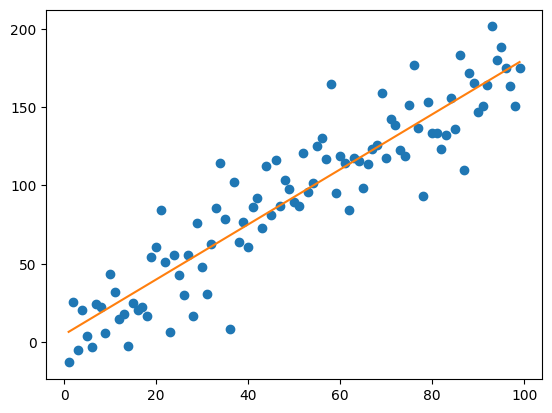

In [38]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt

url = r"https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv"
df = pd.read_csv(url, delimiter=",")

# Extract input variables (all rows, all columns but last column)
x = df.values[:, :-1]

# Extract output column (all rows, last column)
y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(x, y)

b1 = fit.coef_.flatten()
b0 = fit.intercept_.flatten()
print(f"b1 = {b1}")
print(f"b0 = {b0}")

# show in chart
plt.plot(x, y, 'o') # scatterplot
plt.plot(x, b1*x+b0) # line
plt.show()